# **Data Science with Python : Assignment 1**

**Name**: Tanaya Badve
                                                
**Student Num:** 20200653

# **Problem Statement**
Gain insights and make analysis about the data extracted using API's,followed by data preparation and finally analysis of data.


# **Import Packages**

In [8]:
import os
import urllib.request
import csv
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import seaborn as sns

1. Imported packages like *urllib.request* for fetching urls which uses http request.
2. Pandas for data manipulation.
3. Warnings to void warnings in python codes.
4. Seaborn for data visualisation.CSV as we would export csv file while progressing.

### **Task 1**: Identify one or more suitable web APIs


*   I have chosen to work with single API i.e. Open weather map ( 	https://openweathermap.org/api )
*   Below is the API mentioned which I used for this project.
*   I am specifically using **Current & forecast weather data**.( https://openweathermap.org/api )
* Characteristics of this API :
  *   The data is available in just **JSON,XML or HTM**L format unlike common formats like CSV.
  *   One can collect and process global or local weather data.
  *   The data fetched is in the form of **Nested JSON**. Example latitude and longitude are columns within a column called 'coord'.
  * Initially I thought that I would be able to collect sufficient data but as the data is in the form of nested json not enabling to extract sufficient data on the basis of certain parameters used in URL like latitude and longitude.
* Characteristics & Ideation of the data :
  * My idea was to extract data related to Ireland and surrounding places to check the current varying weather conditions across places neighbouring Ireland. (As of in Ireland it fluctuates like anytime,anything!)
  * One API call just extracts single json on the basis of inner column parameters passed.
  * So rather I chose to extract data for different counties of Ireland to see how & what the weather data for Ireland looks like in order to fetch similar data.
  * After which I extracted data for neighbouring cities from different European countries sharing similar sort of weather condition.This being my final data for analysis.
*   You an receive the API once you subscribe to Open weather map.
*   Below is the API I received:






In [2]:
APPID = "e2854823451da4b7aed7296ca4943aa3"


## **Task 2 : Collect data from your choosen API**


*   Functions are needed for extracting & collecting raw data.
*   Functionalities of each would be explainedin detail below:
  *   ***create_file*** : It creates file to store the data.
  *   ***new_merged_file***: Appends data to the file created above.
  * ***get_json_data***: Gets json data from the url based on different parameters passed in the url like locations,latitude or longitude.
  * ***get_raw_data*** : Pass the parameter set to build a link to get data.





In [3]:
#create a file for 2 diff types of data to store
import json
def create_file (file_loc, headings): 
    with open(file_loc, "w",newline='') as write_file:  
        f = csv.writer(write_file)
        f.writerow(headings)
    write_file.close()
    
def new_merged_file(file_location,json_data):
    with open(file_location,'a') as json_file: #Opening the file in append mode and dump the data got from each API call.
        json.dump(json_data,json_file,indent=4) 
    json_file.close()
    
# The below function gets the json data from the URL from multiple locations to store it in the file.
def get_json_data(link,file_location,locations):
    
    json_list=[] 
                # for  loop iterates through various locations for collecting weather data.
    for location in locations:
        response=urllib.request.urlopen(link+location+"&APPID="+APPID) 
        json_data=json.loads(response.read())
        json_list.append(json_data)  #appending the list with json data.
    new_merged_file(file_location,json_list) #function to put the json data into file.
    
    
#function to call the API, retreive the raw csv data, and write to a file
def get_and_write_data(link, file_loc): 
    response = urllib.request.urlopen(link)
    html = json.load(response)
    with open(file_loc, "a",newline='') as write_file: #open the file / create it, newline ='' to prevent blank lines being written 
        f = csv.writer(write_file)
        lines = html.strip().split("\n")
        for l in lines:
            if l[0] =="#": # prevent it from writing the comments in the return of each API call
                continue
            elif l[0:10] in ["Not Availa", "There is n"]: #prevent it from writing lines  where no data is present (i.e. returns saying - "Not Available" or "There is no weather data available for the date provided. Past data is available from 1 July, 2008 onwards only.")
                continue
            else: #if doesn't have those it is data and so should be written
                l = l.split(",") #it comes in as a String, so convert to a list for later easier writing and manipulation
                f.writerow(l)
    write_file.close()

def get_raw_data(file_loc, APPID, location): 
        link = "http://api.openweathermap.org/data/2.5/weather?q="
        get_json_data(link, file_loc,location)



## **Task 3 : Parsing and collecting raw data.**
  The below code retrieves raw data from the functions above by indicating when it starts collecting the data and ends collecting the data and writing the data to the json file.

In [4]:
#Parameters that are passed to above function definitions
locations=['Carlow','Cork','Donegal','Dublin','Galway','Kerry','Kildare','Kilkenny','Limerick','Tipperary','Waterford','Wexford']#Locations at which the meetup groups are located
raw_file_location="WeatherMap_raw_data.json" #Name of raw json file which gets created in local directory


print("Begin Raw Weathermap Data Collection")

#Create a new file in write mode.
create_file(raw_file_location," ")

#Call the main get raw data funtion by providing the parameters.
get_raw_data(raw_file_location,APPID,locations)

print("Raw Meetup Data Collection Completed")



Begin Raw Weathermap Data Collection
Raw Meetup Data Collection Completed


## **Task 4: Load and represent the data using an appropriate data structure. Apply any pre-processing steps to clean/filter/combine the data.**
  *   I have written below code to mormalize semi-structured nested JSON into flat table.
  *   Basically nested json file is painful to flatten and load it into Pandas. 
  *  I used the above created *WeatherMap_raw_data.json* to create flatten pandas dataframe from one nested array.
  *  Then flattened another array to unpack deeply nested array.
  *  On the basis of locations mentioned in the above list,created a dataframe and manipulated the data by dropping uncecessary column and stored in a new dataframe.








In [5]:
from pandas import json_normalize
import numpy as np
with open('WeatherMap_raw_data.json') as read_file:
    Weather_data=json.load(read_file)
badadf=pd.DataFrame()
for index in Weather_data:
    newdf=pd.DataFrame()
    for data in index:
        if not (isinstance(index[data], list) or isinstance(index[data], dict)):
            newdf[data]=index[data]
        else:
            result=json_normalize(index[data])
            df=pd.DataFrame(result)
            if 'id' in df:
                df = df.drop(columns='id', axis=1)
            newdf = pd.concat([newdf, df], axis=1)

    badadf=pd.concat([badadf, newdf], ignore_index=True)
    
badadf.set_index(pd.Series(locations),inplace=True)
badadf


,lon,lat,main,description,icon,base,temp,feels_like,temp_min,temp_max,pressure,humidity,visibility,speed,deg,gust,all,dt,type,country,sunrise,sunset,timezone,id,name,cod
Carlow,-6.9261,52.8408,Clouds,overcast clouds,04d,stations,285.19,284.06,284.82,285.37,1032,89,10000,1.79,269,3.58,99,1616088026,3,IE,1616049288,1616092602,0,2965768,Carlow,200
Cork,-8.4706,51.8980,Clouds,broken clouds,04d,stations,284.46,277.24,284.15,284.82,1033,82,10000,9.77,340,NaN,75,1616088002,1,IE,1616049656,1616092975,0,2965140,Cork,200
Donegal,-8.1167,54.6500,Fog,fog,50d,stations,281.65,279.51,281.15,282.15,1036,100,450,2.57,320,NaN,90,1616088026,1,IE,1616049577,1616092884,0,2964752,Donegal,200
Dublin,-121.9358,37.7021,Clouds,few clouds,02d,stations,285.21,282.94,284.15,286.48,1019,76,10000,2.57,60,NaN,20,1616088026,1,US,1616076826,1616120257,-25200,5344157,Dublin,200
Galway,-9.0489,53.2719,Clouds,broken clouds,04d,stations,284.77,281.58,284.26,285.15,1034,82,10000,4.12,310,NaN,75,1616088027,1,IE,1616049797,1616093111,0,2964180,Galway,200
Kerry,153.0167,-28.1000,Clouds,overcast clouds,04n,stations,292.04,293.24,292.04,292.04,1013,92,10000,2.02,181,3.66,88,1616088027,3,AU,1616097040,1616140856,36000,2161557,Kerry,200
Kildare,-6.9144,53.1561,Clouds,overcast clouds,04d,stations,285.02,283.80,284.82,285.37,1032,88,10000,1.79,338,3.58,95,1616088027,3,IE,1616049286,1616092598,0,2963436,Kildare,200
Kilkenny,-7.2522,52.6542,Clouds,overcast clouds,04d,stations,284.91,282.18,284.26,285.37,1031,83,10000,3.58,295,5.81,99,1616088027,3,IE,1616049365,1616092680,0,2963398,Kilkenny,200
Limerick,-8.6231,52.6647,Clouds,broken clouds,04d,stations,284.70,281.49,284.26,285.15,1034,82,10000,4.12,310,NaN,75,1616088028,1,IE,1616049694,1616093010,0,2962943,Limerick,200
Tipperary,-8.1558,52.4733,Clouds,overcast clouds,04d,stations,284.26,282.35,284.26,284.26,1024,91,10000,2.68,346,4.92,100,1616088028,3,IE,1616049582,1616092898,0,2961192,Tipperary,200


In [87]:
badadf.isnull().sum()


lon             0
lat             0
main            0
description     0
icon            0
base            0
temp            0
feels_like      0
temp_min        0
temp_max        0
pressure        0
humidity        0
visibility      0
speed           0
deg             0
gust            6
all             0
dt              0
type            1
country         0
sunrise         0
sunset          0
timezone        0
id              0
name            0
cod             0
sea_level      11
grnd_level     11
dtype: int64

In [88]:
badadf.dtypes.value_counts()

float64    11
int64      11
object      6
dtype: int64

The API has 27 columns in total.

These 3 columns : Type,sea-level groundlevel,we wont be using for analysis so dropping these columns.

As only 3 column has NULL values,but we won't be using these columns for data analysis.

In [16]:
del badadf["type"]
del badadf["sea_level"]
del badadf["grnd_level"]

Text(0.5, 1.0, 'County-wise distribution of weather description')

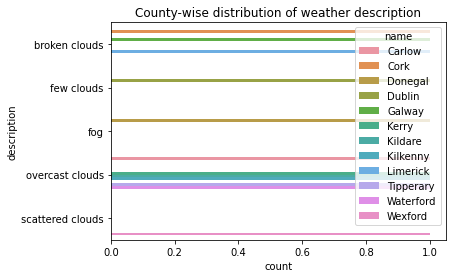

In [9]:

sns.countplot(y='description',hue=badadf['name'], data=badadf.sort_values('description'))
plt.title('County-wise distribution of weather description')

The above figure explains that majority counties are experiencing broken clouds meaning it is raining  followed by overcast clouds.The county-wise distribution of weather description.The least is scattered clouds.Its just cloudy!
Like no chance of sunshine!

**Crosstab using Pandas**
Crosstab alllows cross tabulations of series of columns in a dataframe by using *crosstab* function.

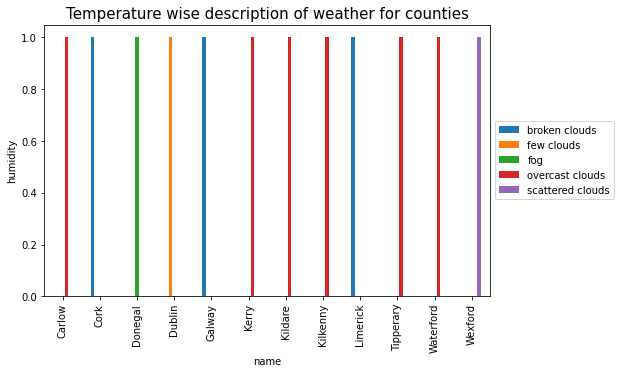

In [11]:
z = pd.crosstab(badadf.name, badadf.description)

y = z.plot.bar(figsize=(8, 5), width=0.5)
y.set_xlabel("name")
y.set_ylabel("humidity")
y.set_title("Humidity wise description of weather for counties", fontsize=15)
y.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

The above figure indicates how humidity varies for different counties as per description of weather.

One could observe that 50% of counties are facing overcast clouds means it is about to rain.Out of remaining 50%, 25% counties have already been facing rains, others like Donegal just been foggy and Wexford having scattered clouds showing signs of rains.

Text(0.5, 1.0, 'Latitude vs Longitude')

<Figure size 720x432 with 0 Axes>

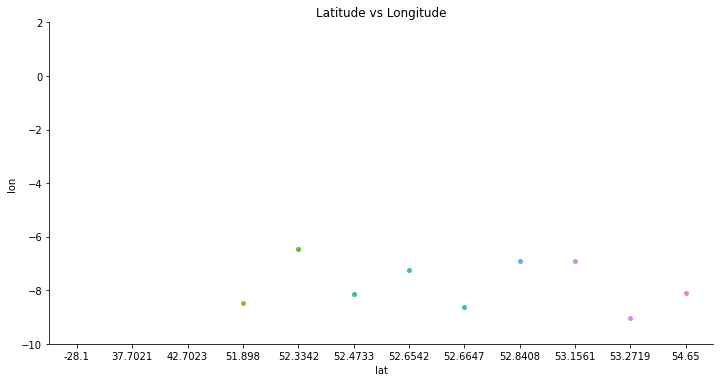

In [12]:
fig=plt.figure(figsize=(10, 6))
sns.factorplot(x="lat", y="lon", data=badadf, kind="swarm", aspect=2);
plt.ylim(-10,2)
plt.title('Latitude vs Longitude')

The above figure gives a better glimpse of how the scale of latitude and longitude varies in Ireland for further working.

Text(0.5, 1.0, 'Windspeed vs Temperature')

<Figure size 720x432 with 0 Axes>

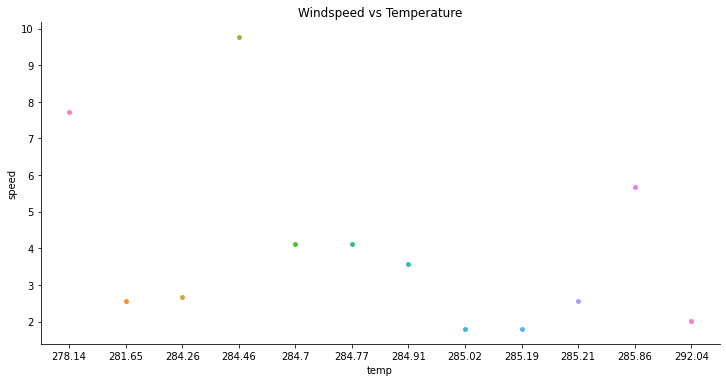

In [13]:
fig=plt.figure(figsize=(10, 6))
sns.factorplot(x="temp", y="speed", data=badadf, kind="swarm", aspect=2);
plt.title('Windspeed vs Temperature')

The above figure shows how the base temperature of counties varies with windspeed showing linearity except the few.

The above dataframe extracted data for all the columns that API fetches for the given locations in order to see what trend Ireland's counties show in current data.

The analysis till now confirmed that cities across Ireland show latitude and longitude in a range [lat,lon] = [53,-8].So here now I am exploring cities showing weather conditions nearly of this range.So further I am extracting cities which show similar weather conditions outside of Ireland.

## **Task 5: Analyse and summarise the cleaned dataset**
*    I attempted to show how the weather changes based on longitude and latitude.
*   I tried analysis by taking neighbouring cities into picture which showed latitude and longitude similarities with Ireland.
*   My goal was to visualize weather of 500+ randomly generated cities across the globe showing similar latitude and longitude range.
*   For randmly generating cities,I have used python's *citipy* library and created a represenattive model of weather across cities. 









In [17]:
import time
from pprint import pprint

!pip install citipy

from citipy import citipy

     |████████████████████████████████| 563kB 5.0MB/s 
  Created wheel for citipy: filename=citipy-0.0.5-cp37-none-any.whl size=559702 sha256=f2f9036d2e94eb469f3e5f5baf0cf5bacb3ba8e7221a438a7f8ab7a5bd34a442
  Stored in directory: /root/.cache/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy


It outputs the list of city wise data of weather.

**Generating Cities list**

In [18]:
op_csv_file = "csv_cities.csv"

#Actual Latitude and longitude range
lat_range = (-90, 90)
lng_range = (-180, 180)

lats_longs = []
euro_cities = []
# Set desired number of cities
no_of_city = 380
# Set random seed to generate the same random lat and lng combinations
SEED = 50
# Set seed
np.random.seed(SEED)
#Randomly choosing set of latitudes and longitudes
lats = np.random.uniform(low=38.000, high=60.000, size=no_of_city*10)
lngs = np.random.uniform(low=-12.000, high=15.000, size=no_of_city*10)
lats_longs = zip(lats, lngs)

# Looking for closeby cities for latitude and latitudes combinations fetched
for i in lats_longs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    #Appending unique cities
    if city not in euro_cities:
        euro_cities.append(city)
    
    if len(euro_cities) >= no_of_city:
        print(f"The extracting sample includes {len(euro_cities)} cities")
        break

The extracting sample includes 380 cities


In [19]:
#building url to access api data
url = "http://api.openweathermap.org/data/2.5/weather?"

query_url = f"{url}appid={APPID}&q="

* Performing successive API calls in order to fetch data
as per only the wanted columns.
* The main motto for fetching below mentioned columns was to make analysis about how temperature,humidity,pressure,windspeed,cloudiness characteristics of weather affect cities of multiple countries closer to Ireland.

In [20]:
import requests
citiesList = []
try:
  # print("Beginning Data Retrieval")
  # wanted =badadf[['name','lat','lon','temp','humidity','pressure','all','speed','country','type']]
  # print(wanted.head())
  #newcities=[]
  for city in euro_cities:
  #   if ' ' in city:
  #     city =city.replace(' ','%20')
  #     newcities.append(city)


  # print(newcities)
           print(f"Processing Record of | {city}")
           urlreq = requests.get(query_url + city).json()
           name = (urlreq["name"])
           Type =(urlreq['sys']['type'])
           Country =(urlreq['sys']['country'])
           lat = (urlreq['coord']['lat'])
           Long = (urlreq['coord']['lon'])
           temp = (urlreq['main']['temp'])
           tempMax = (urlreq['main']['temp_max'])
           tempMin = (urlreq['main']['temp_min'])
           humidity = (urlreq['main']['humidity'])
           pressure = (urlreq['main']['pressure'])
           cloudiness = (urlreq['clouds']['all'])
           windspeed = (urlreq['wind']['speed'])
           data_dict = {"City Name": name,
                              "Country": Country,
                              "Type" : Type, 
                             "Latitude": lat,
                            "Longitude": Long,
                             "Temperature": temp,
                              "Max_Temp": tempMax,
                              "Min_Temp": tempMin,
                             "Humidity": humidity,
                             "Pressure": pressure,
                             "Cloudiness": cloudiness,
                             "Windspeed": windspeed}
           citiesList.append(data_dict)
    
except(KeyError):
    print("Cannot find city name from the data.")
    next
print(citiesList[0])

Processing Record of | penzance
Processing Record of | amurrio
Processing Record of | bermeo
Processing Record of | arosa
Processing Record of | niort
Processing Record of | stromness
Processing Record of | chateauroux
Processing Record of | great yarmouth
Processing Record of | kirkcudbright
Processing Record of | copparo
Processing Record of | naron
Processing Record of | chamonix-mont-blanc
Processing Record of | agucadoura
Processing Record of | orje
Processing Record of | kungalv
Processing Record of | abbeville
Processing Record of | castel san giovanni
Processing Record of | peterhead
Processing Record of | monster
Processing Record of | chatellerault
Processing Record of | feuchtwangen
Processing Record of | lannion
Processing Record of | visnes
Processing Record of | meiningen
Processing Record of | celle
Processing Record of | colares
Processing Record of | aviles
Processing Record of | portalegre
Processing Record of | ejea de los caballeros
Processing Record of | stornoway


**Converting the newer cities raw data to dataframe**

In [21]:
cityDF = pd.DataFrame.from_dict(citiesList)
csv_export = cityDF.to_csv (r'euro_citiesDF.csv', index = None, header=True)
cityDF.head(5)

,City Name,Country,Type,Latitude,Longitude,Temperature,Max_Temp,Min_Temp,Humidity,Pressure,Cloudiness,Windspeed
0,Penzance,GB,1,50.1186,-5.5371,281.91,282.15,281.48,87,1029,75,9.26
1,Amurrio,ES,3,43.0500,-3.0000,282.26,282.59,282.04,63,1007,97,0.45
2,Bermeo,ES,1,43.4209,-2.7215,282.41,283.15,282.04,57,1025,75,3.09
3,Arosa,CH,1,46.7779,9.6762,266.87,269.26,264.15,53,1011,20,1.54
4,Arrondissement de Niort,FR,3,46.3333,-0.3333,280.93,280.93,280.93,66,1023,98,1.34


In [23]:
cityDF.isnull().sum()

City Name      0
Country        0
Type           0
Latitude       0
Longitude      0
Temperature    0
Max_Temp       0
Min_Temp       0
Humidity       0
Pressure       0
Cloudiness     0
Windspeed      0
dtype: int64

No NULL values so we can rest assure about our data.

In [24]:
cityDF.dtypes.value_counts()

float64    6
int64      4
object     2
dtype: int64

Only fetched those columns which we wanted to perform analysis on.

## **Statistical Analysis of data**

In [25]:
cityDF.describe()

,Type,Latitude,Longitude,Temperature,Max_Temp,Min_Temp,Humidity,Pressure,Cloudiness,Windspeed
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1.415094,49.888070,0.680225,280.231887,280.990943,279.458679,71.433962,1021.981132,59.132075,4.138868
std,0.818863,6.064059,12.582895,4.571691,4.110611,5.241358,14.913223,5.956543,32.830589,2.485830
min,1.000000,38.799200,-73.357900,266.870000,269.260000,261.480000,29.000000,1007.000000,0.000000,0.450000
25%,1.000000,44.893000,-4.049100,277.620000,278.150000,275.930000,62.000000,1018.000000,40.000000,2.570000
50%,1.000000,50.567900,1.730500,280.150000,280.150000,279.820000,71.000000,1021.000000,75.000000,3.600000
75%,1.000000,54.838300,9.433500,283.150000,283.150000,282.150000,82.000000,1028.000000,79.000000,6.170000
max,3.000000,60.000000,13.017500,290.510000,291.150000,290.150000,100.000000,1033.000000,100.000000,10.290000


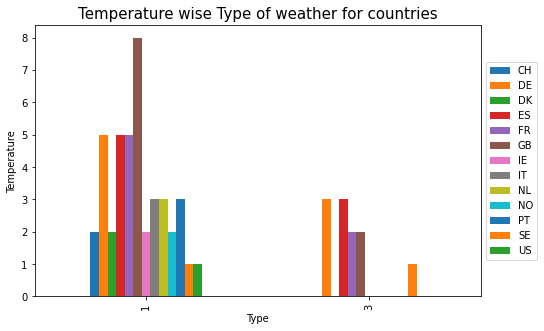

In [27]:
z = pd.crosstab(cityDF.Type, cityDF.Country)

y = z.plot.bar(figsize=(8, 5), width=0.5)
y.set_xlabel("Type")
y.set_ylabel("Temperature")
y.set_title("Temperature wise Type of weather for countries", fontsize=15)
y.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

Though Type is an internal categorical parameter but it isn't fetchning me much information for analysis as it shows Type1 and Type3 for certain cities of France,Great Britain.As this column isn't contrubuting much to further analysis,so dropping *Type.*


In [28]:
del cityDF["Type"]

**Using Matplotlib graphs for EDA**
*   How Latitude varies with Temperature,Humidity,Pressure,cloudiness,windspeed.
For this I have used *scatter* plot for analysis.




Text(0, 0.5, 'Max Temperature (F)')

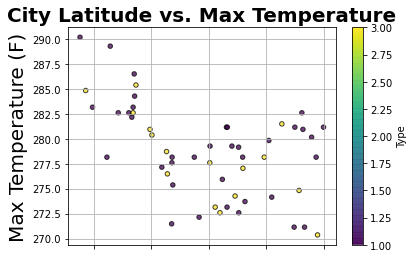

In [93]:
import matplotlib.pyplot as plt

ax1 = cityDF.plot.scatter("Latitude",
                      "Max_Temp",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black",c="Type", alpha=0.75,cmap='viridis') 
#city_list_df.colorbar('Country')
#plt.ylim(30, 110)
#plt.xlim(-60,80)
plt.grid()
ax1.set_title('City Latitude vs. Max Temperature', fontdict={'fontsize': 20, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=20)
ax1.set_ylabel('Max Temperature (F)', fontsize=20)

Text(0, 0.5, 'Humidity (%)')

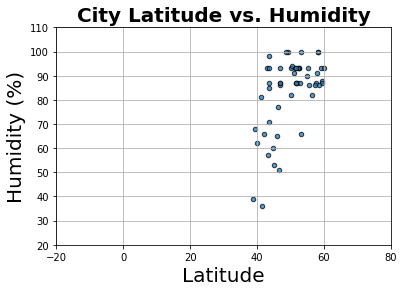

In [94]:
ax1 = cityDF.plot.scatter("Latitude",
                      "Humidity",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black", alpha=0.75) 
plt.ylim(20, 110)
plt.xlim(-20,80)
plt.grid()
ax1.set_title('City Latitude vs. Humidity', fontdict={'fontsize': 20, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=20)
ax1.set_ylabel('Humidity (%)', fontsize=20)

Text(0, 0.5, 'Cloudiness (%)')

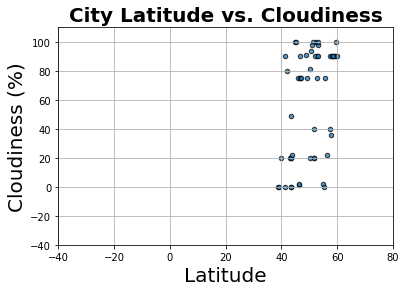

In [95]:
ax1 = cityDF.plot.scatter("Latitude",
                      "Cloudiness",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black", alpha=0.75) 
plt.ylim(-40, 110)
plt.xlim(-40,80)
plt.grid()
ax1.set_title('City Latitude vs. Cloudiness', fontdict={'fontsize': 20, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=20)
ax1.set_ylabel('Cloudiness (%)', fontsize=20)

Text(0, 0.5, 'Windspeed (mph)')

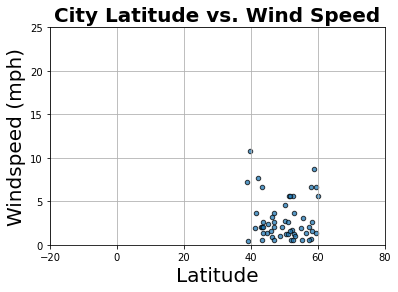

In [96]:
ax1 = cityDF.plot.scatter("Latitude",
                      "Windspeed",
                      marker="o", 
                      facecolors="DarkBlue", 
                      edgecolors="black", alpha=0.75) 
plt.ylim(0, 25)
plt.xlim(-20,80)
plt.grid()
ax1.set_title('City Latitude vs. Wind Speed', fontdict={'fontsize': 20, 'fontweight': 'heavy'})
ax1.set_xlabel("Latitude", fontsize=20)
ax1.set_ylabel('Windspeed (mph)', fontsize=20)

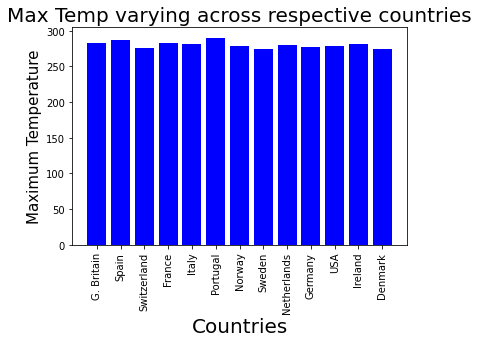

In [97]:
plt.title('Max Temp varying across respective countries',fontsize=20)
plt.xlabel("Countries",fontsize=20)
plt.ylabel("Maximum Temperature",fontsize=15)
positions = (0, 1,2, 3, 4, 5, 6, 7, 8,9,10,11,12)

labels=["G. Britain","Spain","Switzerland","France","Italy","Portugal","Norway","Sweden","Netherlands","Germany","USA","Ireland","Denmark"]
plt.xticks(positions, labels,rotation=90)
plt.bar(cityDF["Country"], cityDF["Max_Temp"], color='blue')
plt.show()

**Statistical analysis of data**


*   describe()
*   skew()
*   Quantile calculation for outliers.

In [98]:
cityDF.describe()


,Type,Latitude,Longitude,Temperature,Max_Temp,Min_Temp,Humidity,Pressure,Cloudiness,Windspeed
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,1.603774,49.888070,0.680225,277.966604,278.765660,277.112264,82.943396,1026.603774,58.509434,2.890377
std,0.926939,6.064059,12.582895,4.735397,4.609064,5.118234,15.445207,5.565483,38.002339,2.417509
min,1.000000,38.799200,-73.357900,268.200000,270.370000,265.150000,36.000000,1013.000000,0.000000,0.450000
25%,1.000000,44.893000,-4.049100,274.110000,275.370000,272.040000,81.000000,1024.000000,20.000000,1.280000
50%,1.000000,50.567900,1.730500,278.150000,278.710000,278.150000,87.000000,1027.000000,75.000000,2.060000
75%,3.000000,54.838300,9.433500,281.150000,281.480000,281.150000,93.000000,1030.000000,90.000000,3.600000
max,3.000000,60.000000,13.017500,288.860000,290.150000,288.150000,100.000000,1037.000000,100.000000,10.800000


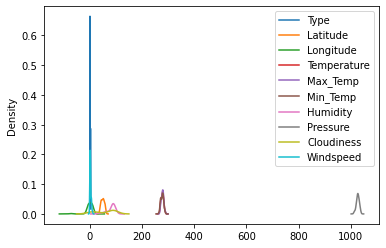

In [99]:
cityDF.plot(kind='density')

In [100]:
Q1 = cityDF.quantile(0.25)
Q3 = cityDF.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Type            2.0000
Latitude        9.9453
Longitude      13.4826
Temperature     7.0400
Max_Temp        6.1100
Min_Temp        9.1100
Humidity       12.0000
Pressure        6.0000
Cloudiness     70.0000
Windspeed       2.3200
dtype: float64


In [62]:
#print(cityDF < (Q1 - 1.5 * IQR)) |(cityDF > (Q3 + 1.5 * IQR))


Checking for skewness of data
**bold text**.skew() would help me find asymmetric distribution across the data.Ideally the value must be between -1 to 1.

In [101]:
print(cityDF['Windspeed'].skew())
cityDF['Windspeed'].describe()

1.3816196658359707


count    53.000000
mean      2.890377
std       2.417509
min       0.450000
25%       1.280000
50%       2.060000
75%       3.600000
max      10.800000
Name: Windspeed, dtype: float64

In [102]:
print(cityDF['Min_Temp'].skew())
cityDF['Min_Temp'].describe()

-0.07719174432105984


count     53.000000
mean     277.112264
std        5.118234
min      265.150000
25%      272.040000
50%      278.150000
75%      281.150000
max      288.150000
Name: Min_Temp, dtype: float64

In [103]:
print(cityDF['Max_Temp'].skew())
cityDF['Max_Temp'].describe()

0.1744892302203336


count     53.000000
mean     278.765660
std        4.609064
min      270.370000
25%      275.370000
50%      278.710000
75%      281.480000
max      290.150000
Name: Max_Temp, dtype: float64

In [104]:
print(cityDF['Temperature'].skew())
cityDF['Temperature'].describe()

0.05349651755741353


count     53.000000
mean     277.966604
std        4.735397
min      268.200000
25%      274.110000
50%      278.150000
75%      281.150000
max      288.860000
Name: Temperature, dtype: float64

In [105]:
print(cityDF['Pressure'].skew())
cityDF['Pressure'].describe()

-0.3998548252770654


count      53.000000
mean     1026.603774
std         5.565483
min      1013.000000
25%      1024.000000
50%      1027.000000
75%      1030.000000
max      1037.000000
Name: Pressure, dtype: float64

In [106]:
print(cityDF['Humidity'].skew())
cityDF['Humidity'].describe()

-1.4276260248078876


count     53.000000
mean      82.943396
std       15.445207
min       36.000000
25%       81.000000
50%       87.000000
75%       93.000000
max      100.000000
Name: Humidity, dtype: float64

Dropping an outlier i.e. it randomly showed country with vast latitude and longitude range out of what we are observing so removed it.

In [107]:
#index = city_list_df[(city_list_df['Country'] == 'US')
#city_list_df.drop(index, inplace=True)
#city_list_df
#city_list_df['Temperature'].describe()

new_df=cityDF[cityDF['Country'] != 'US']

Below shows analysis of how for given range of latitude and longitude,countries are present.

Text(-0.3, 1.3, '% country data')

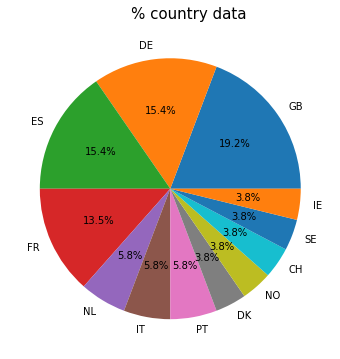

In [108]:
#To show the percentage of Size of the groups
fig, ax = plt.subplots(figsize=(6,6))
fig.subplots_adjust(hspace=50)
size_counts = new_df["Country"].value_counts()
ax.pie(new_df['Country'].value_counts(),labels=size_counts.index,autopct="%.1f%%")
ax.text(-0.3,1.3,'% country data',fontsize=15)

**Factor plot for analysis**

A factor plot combines categorical columns with the class and gives the output in the form of facetgrid. 
Generaly Factor plots are preferred for studying categorical variables.

Below shows factor plots of how countries are varying in terms of Humidity,Pressure,Windspeed and cloudiness.

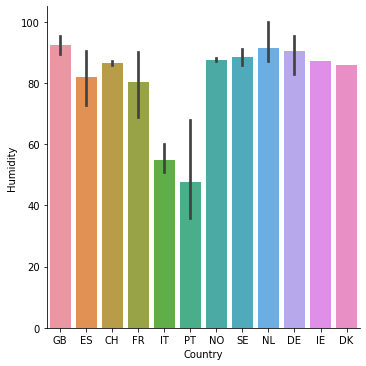

In [109]:
# It shows the features like Country,Humidity on x and y axis.
sns.factorplot(x="Country", y="Humidity", data=new_df, kind="bar");

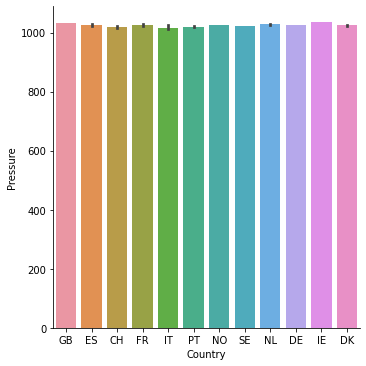

In [110]:
sns.factorplot(x="Country", y="Pressure", data=new_df, kind="bar");

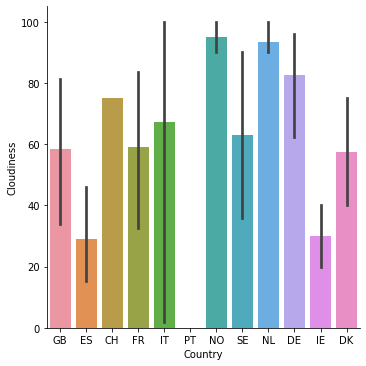

In [111]:
sns.factorplot(x="Country", y="Cloudiness", data=new_df, kind="bar");

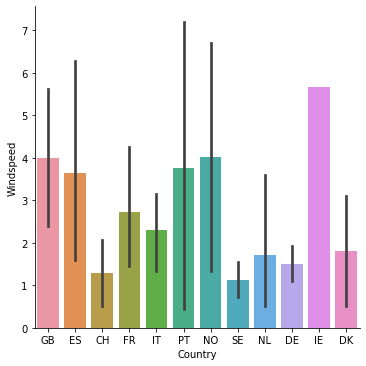

In [112]:
sns.factorplot(x="Country", y="Windspeed", data=new_df, kind="bar");

**Seaborn** library for plotting pairgrid of all the columns how they are varying and distributed with self and every other column like 
  *   *Temperature* linearly varies with Max and Min temperature value.
  *   Latitude is distributed naturally and equivalently when compared to Humidity,Pressure,Windspeed and cloudiness but that is not the case with longitude.
  *  How *Type* being an internal parameter is disconnected with rest of columns.






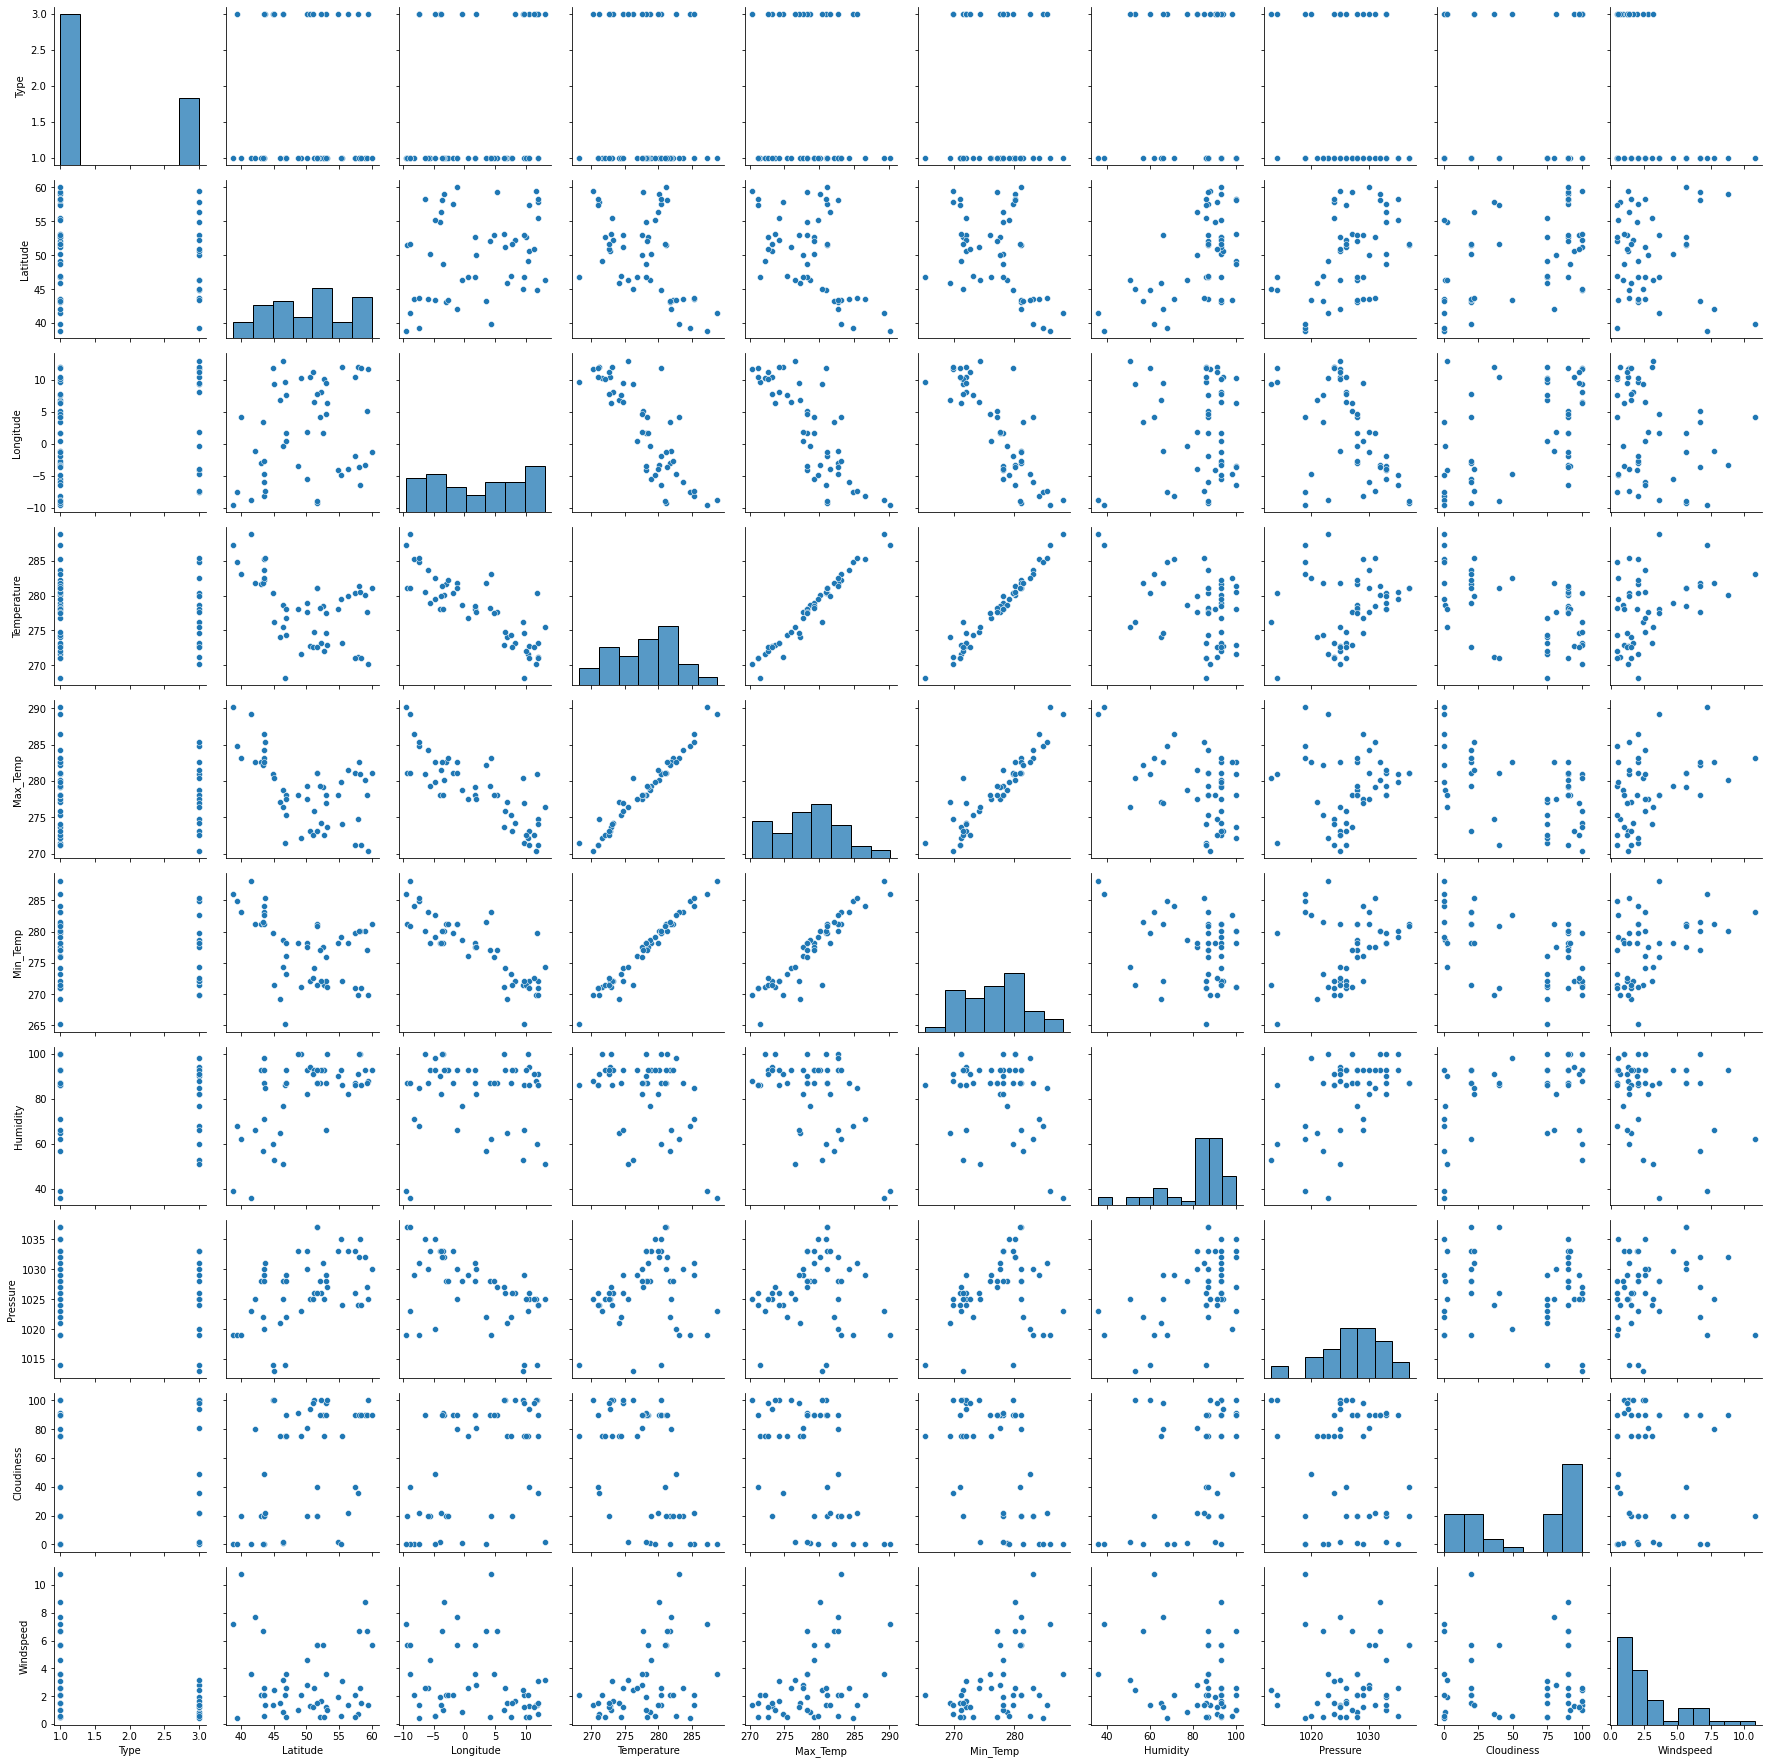

In [113]:
import seaborn as sns
g = sns.PairGrid(new_df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

CH
      City Name Country  Type  ...  Pressure  Cloudiness  Windspeed
3         Arosa      CH     1  ...      1014          75       2.06
33  Konolfingen      CH     1  ...      1022          75       0.51

[2 rows x 12 columns]
DE
         City Name Country  Type  ...  Pressure  Cloudiness  Windspeed
20    Feuchtwangen      DE     1  ...      1023          75       2.06
23       Meiningen      DE     3  ...      1025          94       1.28
24           Celle      DE     1  ...      1025          75       0.51
34    Visselhövede      DE     3  ...      1029          98       1.20
35            Belm      DE     3  ...      1026         100       1.65
36  Korschenbroich      DE     1  ...      1026         100       2.57
41      Hopfgarten      DE     3  ...      1025          98       1.25
49           Bönen      DE     1  ...      1026          20       1.54

[8 rows x 12 columns]
DK
        City Name Country  Type  ...  Pressure  Cloudiness  Windspeed
39  Frederikshavn      DK     1 

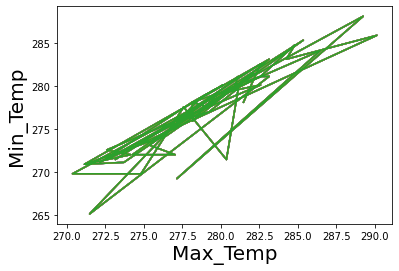

In [114]:
fig, ax = plt.subplots()
r=new_df['Max_Temp']
s=new_df['Min_Temp']
for Max_temp, Min_temp in cityDF.groupby("Country"):
  print(Max_temp)
  print(Min_temp)
  ax.plot(r,
         s,)
  plt.xlabel("Max_Temp", fontsize=20)
  plt.ylabel("Min_Temp", fontsize=20)
  #       color=colors["Max_temp"])

Above plot categorises data country-wise and showing the trend of how the min and max temperature in these countries vary as a group.
How maximum of data points for countries behave linearly and closely in terms of min and max temperature like a bunch of them between 40-60 showing darker shade.

**Regression Analysis :** This plot shows how lineraly temperature and other components in the climate varies.

For this I used scipy's *linregress* library.

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12.]),
 <a list of 8 Text major ticklabel objects>)

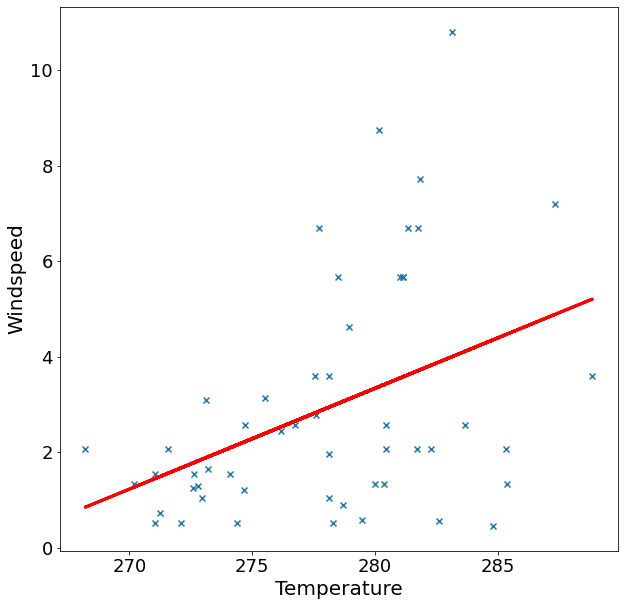

In [115]:
from scipy.stats import linregress
x=new_df['Temperature']
y=new_df['Windspeed']
stats = linregress(x,y )
m = stats.slope
b = stats.intercept
# Change the default figure size
plt.figure(figsize=(10,10))
# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='x')
# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)
# Add x and y lables, and set their font size
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Windspeed", fontsize=20)
# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)


Here temperature shows negative linear relationship with Cloudiness which means as the temperature increases,the cloudiness decreases and vice versa.

(array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 8 Text major ticklabel objects>)

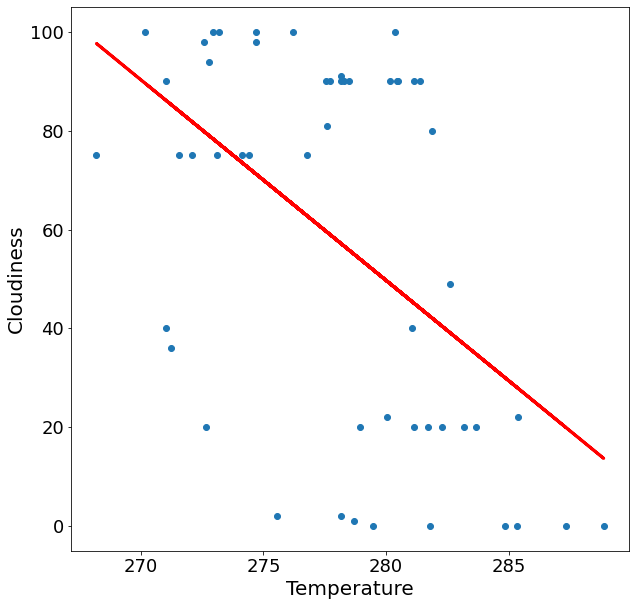

In [116]:
x=new_df['Temperature']
y=new_df['Cloudiness']
stats = linregress(x,y )
m = stats.slope
b = stats.intercept
# Change the default figure size
plt.figure(figsize=(10,10))
# Change the default marker for the scatter from circles to x's
plt.scatter(x, y, marker='o')
# Set the linewidth on the regression line to 3px
plt.plot(x, m * x + b, color="red", linewidth=3)
# Add x and y lables, and set their font size
plt.xlabel("Temperature", fontsize=20)
plt.ylabel("Cloudiness", fontsize=20)
# Set the font size of the number lables on the axes
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

**Discussing Observational Trends & Futuristic scope**
*   Cities with latitude in the range -20 to 40 have the highest temperatures.
*   The city with the highest windspeed has the lowest lattitude value.

*   Similarly, the city with the lowest humidity percent has the lowest latitude value.
*   Temperature behaves negatively with cloudiness and positively with windspeed.


Would want to explore more on the main and extract description of weather like mist,cloudy,dry etc.and could use these descriptions and perform *Natural Language Processing* to extract keywords or topic modelling country-wise.

Exploring columns like Sea-level and Ground-level might fetch some relatability with climate on weather conditions.

References for project : *Sample-api.html* file by Module coordinator (Derek Greene) and pandas,matplotlib and seaborn library.